In [1]:
x <- sort(runif(50, min = 0, max = 4*pi))
y <- sin(x)

data <- cbind(x,y)

In [2]:
library(neuralnet)
sin.nn <- neuralnet(y ~ x, data = data, hidden = 5, stepmax = 100000, learningrate = 10e-6,  
                    act.fct = 'logistic', err.fct = 'sse', rep = 5, lifesign = "minimal", 
                    linear.output = T)

hidden: 5    thresh: 0.01    rep: 1/5    steps: 
  13867
	error: 0.0477 
	time: 1.49 secs

hidden: 5    thresh: 0.01    rep: 2/5    steps: 
   5177
	error: 0.34334
	time: 0.62 secs

hidden: 5    thresh: 0.01    rep: 3/5    steps: 
  79441
	error: 0.00966
	time: 8.21 secs

hidden: 5    thresh: 0.01    rep: 4/5    steps: 
  89540
	error: 0.04681
	time: 8.95 secs

hidden: 5    thresh: 0.01    rep: 5/5    steps: 
  72111
	error: 0.03779
	time: 7.2 secs



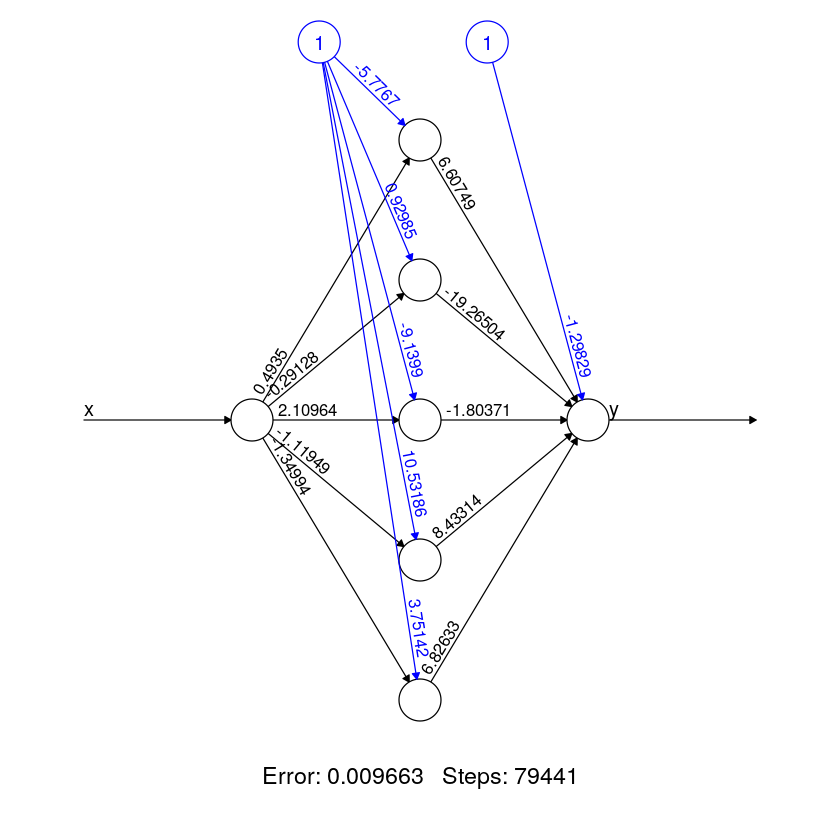

In [3]:
plot(sin.nn, rep = "best")

In [4]:
testdata<- as.data.frame(runif(10, min=0, max=(4*pi)))
testdata

"runif(10, min = 0, max = (4 * pi))"
<dbl>
5.030255
9.796966
2.056584
1.452079
5.320387
6.725653
8.209836
4.779850
6.053073


In [5]:
testdata.result <- sin(testdata)

In [6]:
sin.nn.result <- compute(sin.nn, testdata)
sin.nn.result$net.result

-0.9537296
-0.4352318
0.8619157
0.9973253
-0.8292414
0.4445775
0.9658914
-0.9964434
-0.2096588
-0.1032658


In [7]:
better <- cbind(testdata, sin.nn.result$net.result, testdata.result, (sin.nn.result$net.result-testdata.result))
colnames(better) <- c("Input", "NN Result", "Result", "Error")

better

Input,NN Result,Result,Error
<dbl>,<dbl>,<dbl>,<dbl>
5.030255,-0.9537296,-0.9499046,-0.003825035
9.796966,-0.4352318,-0.3636545,-0.071577273
2.056584,0.8619157,0.8843074,-0.022391693
1.452079,0.9973253,0.9929614,0.004363912
5.320387,-0.8292414,-0.8207934,-0.008448045
6.725653,0.4445775,0.4281707,0.016406763
8.209836,0.9658914,0.9373493,0.028542082
4.779850,-0.9964434,-0.9977254,0.001281967
6.053073,-0.2096588,-0.2280872,0.018428427


In [8]:
library(Metrics)
rmse(better$Result, better$`NN Result`)

[1] 0.02941327

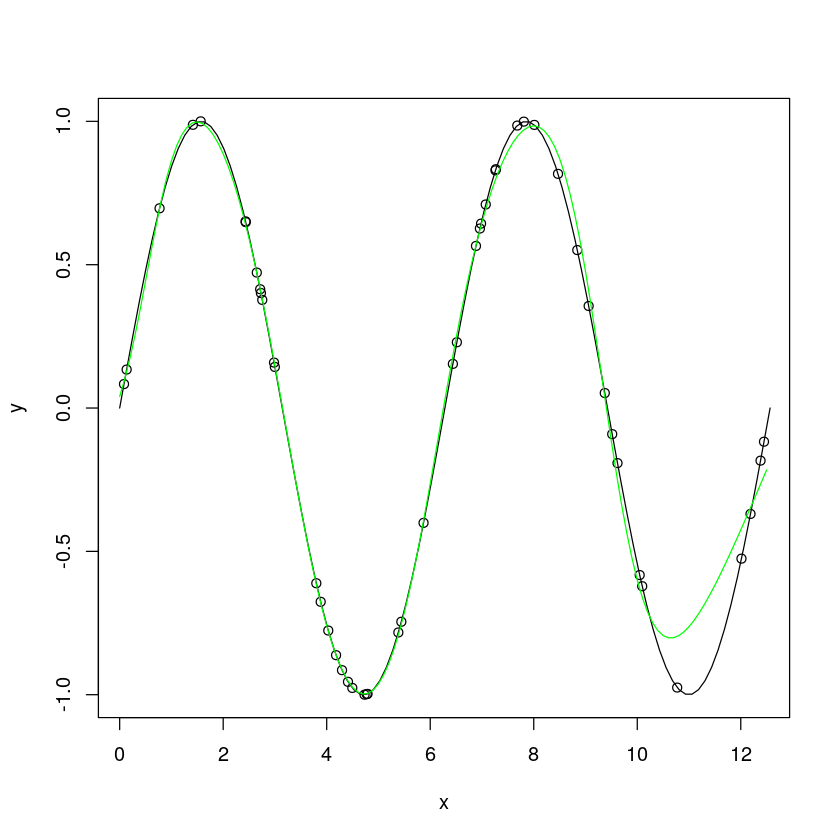

In [9]:
plot(x,y)
plot(sin, 0, (4*pi), add=T)
x1 <- seq(0, 4*pi, by=0.1)
lines(x1, compute(sin.nn, data.frame(x=x1))$net.result, col="green")